

### Other Feature Engineering Techniques



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!pip install dfply
!pip install ggplot
!pip install pandas==0.19.2

In [0]:
from dfply import *



In [0]:
# Loading the necessary library files
import pandas as pd


In [3]:
# Loading data from the drive

# Please change the filename as per the location where the file is stored
filename = '/content/drive/My Drive/Packt_Colab/bank-full.csv'
# Loading the data using pandas

bankData = pd.read_csv(filename,sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Taking the quantiles for 25%, 50% and 75% of the balance data
import numpy as np
np.quantile(bankData['balance'],[0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [5]:
# Creating new features for bank data based on the quantile values

bankData['balanceClass'] = 'Quant1'

bankData.balanceClass[(bankData['balance'] > 72) & (bankData['balance'] < 448)] = 'Quant2'

bankData.balanceClass[(bankData['balance'] > 448) & (bankData['balance'] < 1428)] = 'Quant3'

bankData.balanceClass[bankData['balance'] > 1428] = 'Quant4'

bankData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [6]:
# Normalising data
from sklearn import preprocessing
x = bankData[['balance']].values.astype(float)
# Creating the scaling function
minmaxScaler = preprocessing.MinMaxScaler()
# Transforming the balance data by normalising it with minmaxScalre
bankData['balanceTran'] = minmaxScaler.fit_transform(x)
# Printing the head of the data
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072812


In [0]:
# Adding a small numerical constant to eliminate 0 values

bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

In [8]:
# Let us transform values for loan data
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loanTran[bankData['loan'] == 'no'] = 5
bankData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


In [9]:
# Let us transform values for Housing data
bankData['houseTran'] = 5
# Giving a weight of 1 if the customer has a house
bankData.houseTran[bankData['housing'] == 'no'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


In [11]:
# Let us now create the new variable which is a product of all these
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


In [12]:
# Finding the quantile
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [13]:
# Creating quantiles from the assetindex data
bankData['assetClass'] = 'Quant1'

bankData.assetClass[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57)] = 'Quant2'

bankData.assetClass[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9)] = 'Quant3'

bankData.assetClass[bankData['assetIndex'] > 1.9] = 'Quant4'

bankData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [0]:
# Calculating total of each asset class
assetTot = (bankData >> group_by(X.assetClass) >> summarise(assetTot = X.y.count()))
# Calculating the category wise counts
assetProp = (bankData >> group_by(X.assetClass,X.y) >> summarise(assetCat = X.y.count()))



In [18]:
# Merging both the data frames
assetComb = (pd.merge(assetProp,assetTot,left_on = ['assetClass'],right_on = ['assetClass']) >> mutate(catProp = (X.assetCat/X.assetTot)*100))
assetComb

,y,assetClass,assetCat,assetTot,catProp
0,no,Quant1,10921,12212,89.428431
1,yes,Quant1,1291,12212,10.571569
2,no,Quant2,8436,10400,81.115385
3,yes,Quant2,1964,10400,18.884615
4,no,Quant3,10144,11121,91.214819
5,yes,Quant3,977,11121,8.785181
6,no,Quant4,10421,11478,90.791079
7,yes,Quant4,1057,11478,9.208921


###### Data Driven Feature Engineering

In [19]:
# Looking at Data types
print(bankData.dtypes)

# Looking at descriptive statistics

print(bankData.describe())


age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000

In [0]:
# Taking numeric variables

bankNumeric = bankData[['age','balance','day','duration','campaign','pdays','previous','balanceTran','loanTran','houseTran','assetIndex']]


In [21]:
# Skewness of numeric attributes

bankNumeric.skew()

age             0.684818
balance         8.360308
day             0.093079
duration        3.144318
campaign        4.898650
pdays           2.615715
previous       41.846454
balanceTran     8.360308
loanTran       -1.852617
houseTran      -0.224766
assetIndex      1.221013
dtype: float64

Text(0.5, 1.0, 'Distribution of Asset Index')

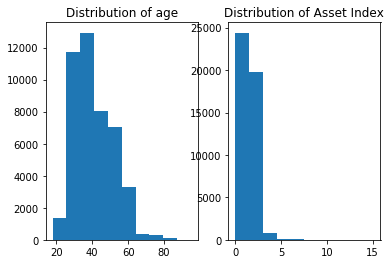

In [24]:
# Histograms

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)

axs[0].hist(bankNumeric['age'])
axs[0].set_title('Distribution of age')

axs[1].hist(bankNumeric['assetIndex'])
axs[1].set_title('Distribution of Asset Index')


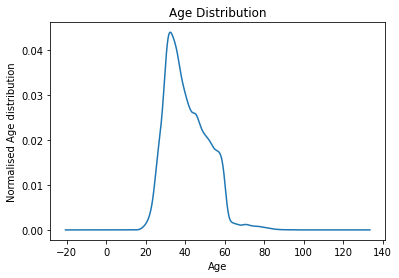

In [25]:
# Density plots
bankNumeric['age'].plot(kind = 'density',subplots = False,layout = (1,1))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Normalised Age distribution')

pyplot.show()



###### Other Standardizing Techniques


In [26]:
# Standardize data ( 0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)

set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ...  0.437  0.894  1.184]
 [ 0.289 -0.438 -1.298 ...  0.437  0.894  0.68 ]
 [-0.747 -0.447 -1.298 ... -2.289  0.894 -0.856]
 ...
 [ 2.925  1.43   0.143 ...  0.437 -1.119 -0.584]
 [ 1.513 -0.228  0.143 ...  0.437 -1.119 -0.824]
 [-0.371  0.528  0.143 ...  0.437 -1.119 -0.715]]


In [27]:
print(bankNumeric.shape)
print(rescaledNum.shape)
bankNumeric.head()
bankNumeric.describe()

(45211, 11)
(45211, 11)


,age,balance,day,duration,campaign,pdays,previous,balanceTran,loanTran,houseTran,assetIndex
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.085181,4.359094,3.223353,1.179189
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.027643,1.467280,1.987511,0.952080
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000010,1.000000,1.000000,0.000010
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.073467,5.000000,1.000000,0.376686
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.076881,5.000000,5.000000,0.569204
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.085778,5.000000,5.000000,1.902725
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000010,5.000000,5.000000,15.108152


In [28]:
# Normalizing Data ( Lenght of 1)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)

set_printoptions(precision = 3)
print(normalisedNum)

[[2.686e-02 9.923e-01 2.315e-03 ... 2.315e-03 2.315e-03 1.068e-03]
 [2.747e-01 1.810e-01 3.121e-02 ... 3.121e-02 3.121e-02 1.141e-02]
 [3.966e-01 2.404e-02 6.010e-02 ... 1.202e-02 6.010e-02 4.377e-03]
 ...
 [1.235e-02 9.805e-01 2.917e-03 ... 8.579e-04 1.716e-04 1.070e-04]
 [6.775e-02 7.940e-01 2.021e-02 ... 5.943e-03 1.189e-03 4.688e-04]
 [1.234e-02 9.906e-01 5.668e-03 ... 1.667e-03 3.334e-04 1.664e-04]]
